In [66]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [67]:
train=pd.read_csv('DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv',parse_dates=['date'])
train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [68]:
test=pd.read_csv('DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv',parse_dates=['date'])
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [69]:
train=train.set_index('date')
print(train)

             meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]


In [70]:
test=test.set_index('date')
print(test)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333
...               ...        ...         ...           ...
2017-04-20  34.500000  27.500000    5.562500    998.625000
2017-04-21  34.250000  39.375000    6.962500    999.875000
2017-04-22  32.900000  40.900000    8.890000   1001.600000
2017-04-23  32.875000  27.500000    9.962500   1002.125000
2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 4 columns]


In [71]:
temp=train[['meantemp']]
print(temp.head())

             meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000


In [72]:
temp_test=test[['meantemp']]
temp_test.head()

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


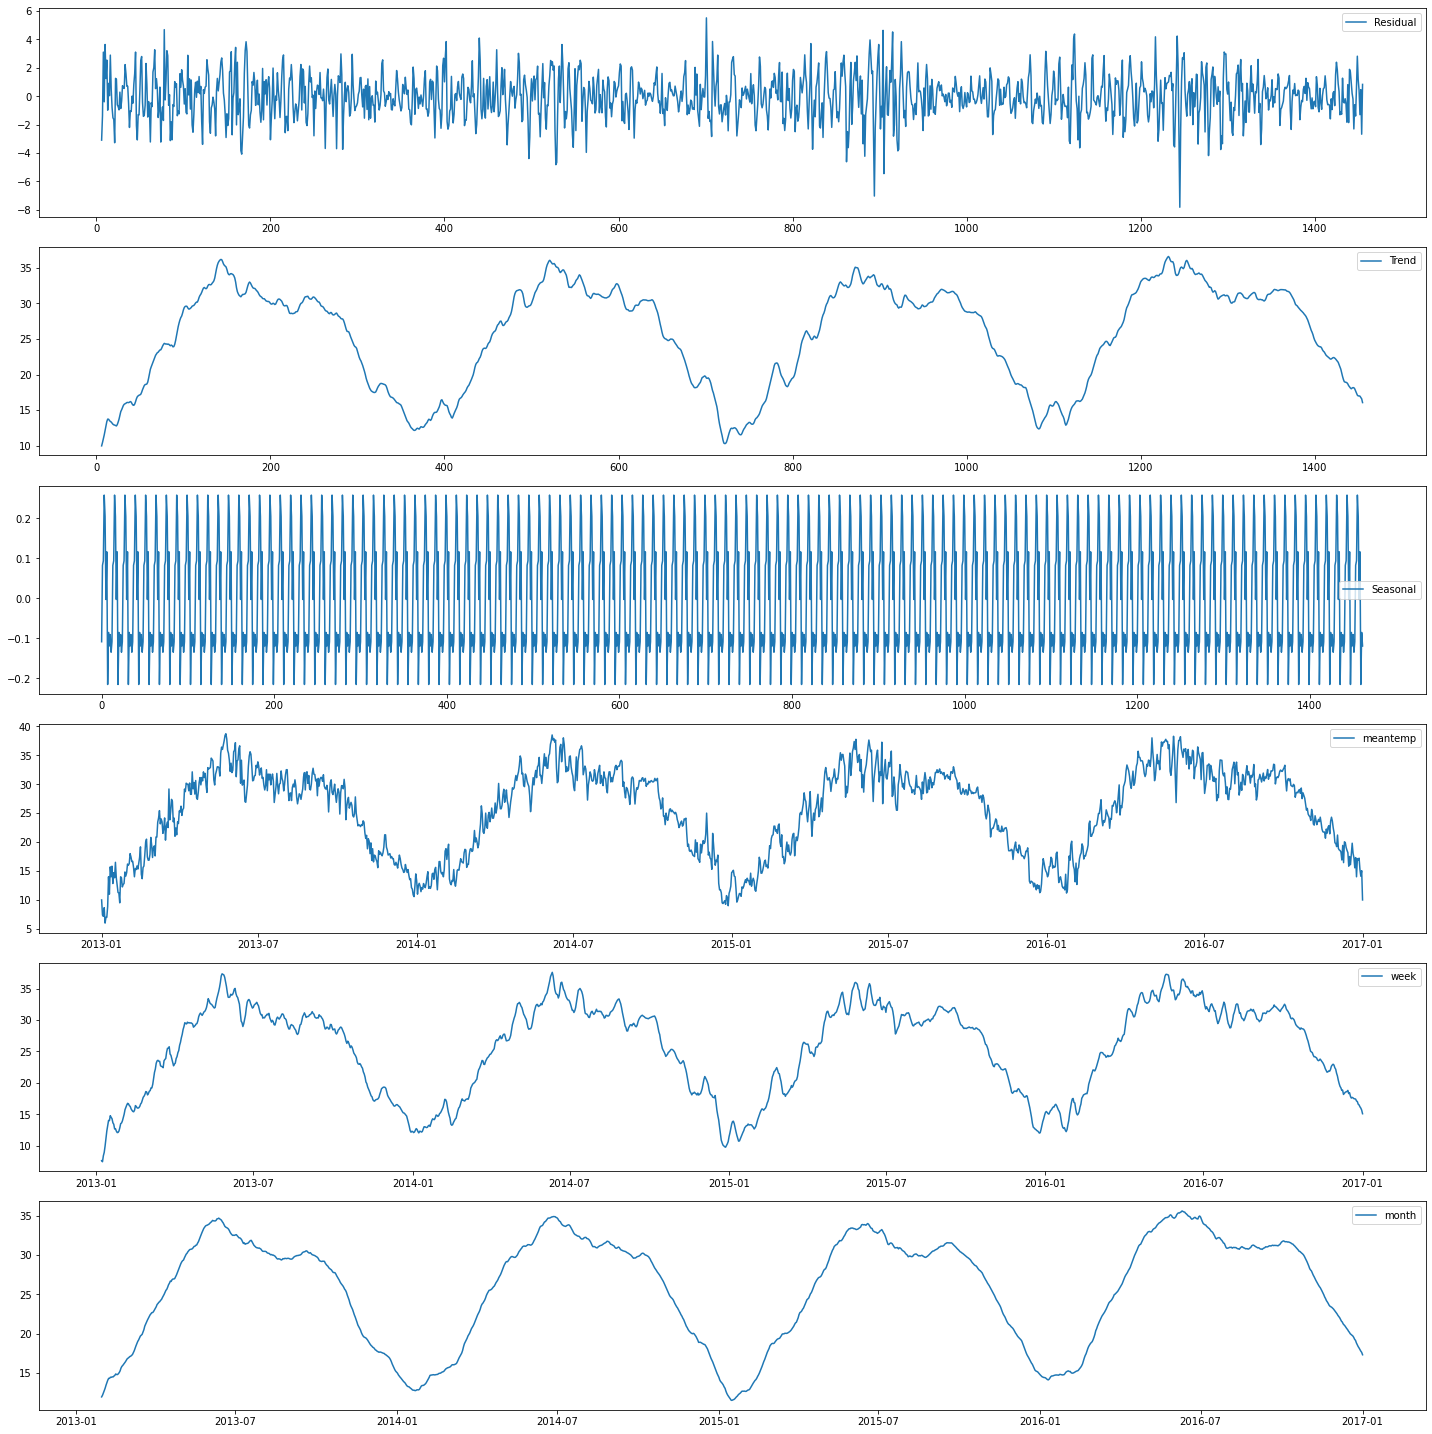

In [73]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

decomposition=seasonal_decompose(np.asarray(temp), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(6,1,figsize=(20,20))

plt.subplot(612)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(613)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(611)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.subplot(614)
plt.plot(temp,label='meantemp')
plt.legend(loc='best')

plt.subplot(615)
plt.plot(temp.rolling(window=7).mean(),label='week')
plt.legend(loc='best')

plt.subplot(616)
plt.plot(temp.rolling(window=30).mean(),label='month')
plt.legend(loc='best')

plt.tight_layout()

In [74]:
temp_week=temp.rolling(window=7).mean()
temp_week.dropna(inplace=True)
temp_week

,meantemp
date,
2013-01-07,7.604762
2013-01-08,7.441497
2013-01-09,8.384354
2013-01-10,8.931973
2013-01-11,9.938776
...,...
2016-12-28,16.480592
2016-12-29,16.188075
2016-12-30,15.980252


# TASK 2

In [75]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
def checkStationarity(data):
    pvalue = adfuller(data)[1]   
    if(pvalue>0.05):
        msg = 'p-value={}. temp_week is not stationary'.format(pvalue)
    else:
        msg='p-value={}. temp_week is stationary'.format(pvalue)
        
    return(msg)

In [76]:
ret=checkStationarity(temp_week); ret

'p-value=0.0725238611640058. temp_week is not stationary'

In [77]:
diff_temp = temp_week - temp_week.shift()
diff_temp.dropna(inplace=True)
diff_temp

,meantemp
date,
2013-01-08,-0.163265
2013-01-09,0.942857
2013-01-10,0.547619
2013-01-11,1.006803
2013-01-12,1.142857
...,...
2016-12-28,-0.118944
2016-12-29,-0.292517
2016-12-30,-0.207823


In [78]:
ret=checkStationarity(diff_temp); ret

'p-value=4.1866103935474905e-06. temp_week is stationary'

In [79]:
diff_temp

,meantemp
date,
2013-01-08,-0.163265
2013-01-09,0.942857
2013-01-10,0.547619
2013-01-11,1.006803
2013-01-12,1.142857
...,...
2016-12-28,-0.118944
2016-12-29,-0.292517
2016-12-30,-0.207823


In [80]:
diff_temp_test = temp_test - temp_test.shift()
diff_temp_test.dropna(inplace=True)
diff_temp_test

,meantemp
date,
2017-01-02,2.586957
2017-01-03,-1.388889
2017-01-04,1.588889
2017-01-05,-0.311111
2017-01-06,0.929293
...,...
2017-04-20,1.000000
2017-04-21,-0.250000
2017-04-22,-1.350000


In [81]:
ret=checkStationarity(diff_temp_test); ret

'p-value=2.8053213689778235e-22. temp_week is stationary'

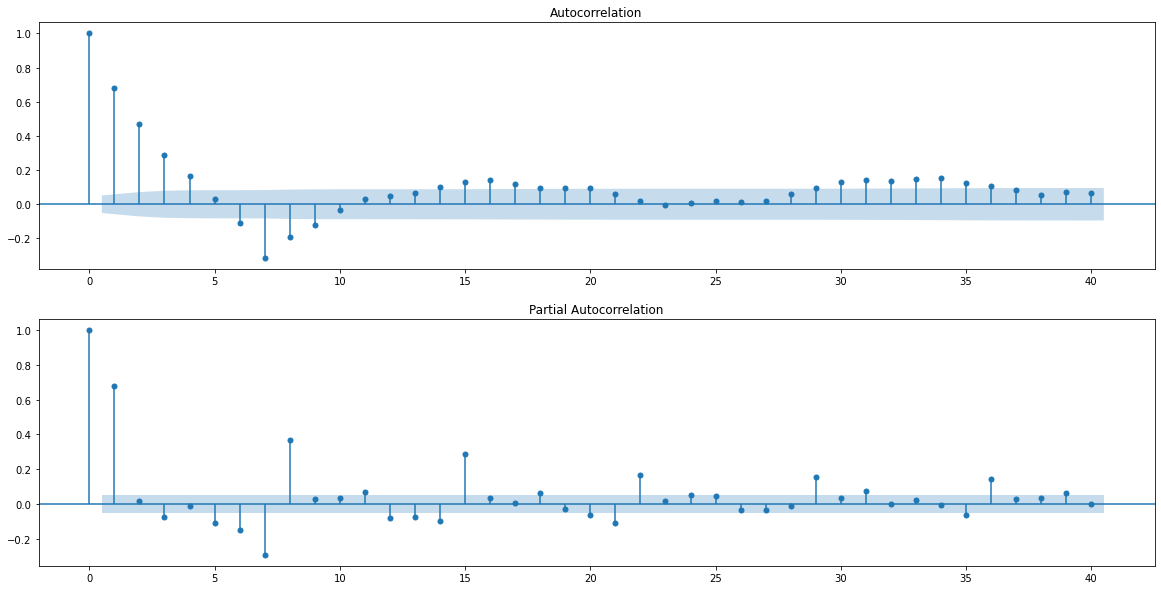

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,ax=plt.subplots(2,1,figsize=(20,10))
plot_acf(diff_temp,lags=40,ax=ax[0])
plot_pacf(diff_temp,lags=40,ax=ax[1])
plt.show()

# TASK 3

In [83]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
for p in range(1,4):
    for q in range(1,4):
        m1 = ARIMA(diff_temp,order=(p,0,q)).fit()
        print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1455
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -372.933
Date:                Wed, 27 Apr 2022   AIC                            753.866
Time:                        13:28:54   BIC                            774.997
Sample:                    01-08-2013   HQIC                           761.750
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.026      0.155      0.877      -0.047       0.055
ar.L1          0.6906      0.026     26.543      0.000       0.640       0.742
ma.L1         -0.0190      0.035     -0.539      0.5

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1455
Model:                 ARIMA(2, 0, 3)   Log Likelihood                   0.000
Date:                Wed, 27 Apr 2022   AIC                             14.000
Time:                        13:29:01   BIC                             50.979
Sample:                    01-08-2013   HQIC                            27.797
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1606         -0       -inf      0.000       4.161       4.161
ar.L1      -3.374e-06   1.07e-08   -314.766      0.000   -3.39e-06   -3.35e-06
ar.L2          1.0000   4.55e-08    2.2e+07      0.0

ARIMA (3,0,2) [LLR = -252.545 , AIC=519 , BIC=556 ,HQIC =532]

In [84]:
m1 = ARIMA(diff_temp,order=(3,0,2)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1455
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -252.545
Date:                Wed, 27 Apr 2022   AIC                            519.091
Time:                        13:29:13   BIC                            556.070
Sample:                    01-08-2013   HQIC                           532.888
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.024      0.113      0.910      -0.045       0.050
ar.L1          0.2772      0.022     12.431      0.000       0.234       0.321
ar.L2         -0.4637      0.019    -24.851      0.0

In [85]:
m1.aic,m1.bic,m1.hqic

(519.0909994436636, 556.0703277009027, 532.8881404686297)

In [86]:
predictions=m1.predict(0,len(diff_temp_test))
predictions

2013-01-08    0.002734
2013-01-09   -0.110326
2013-01-10    0.648648
2013-01-11    0.493548
2013-01-12    0.550071
                ...   
2013-04-27    0.006643
2013-04-28    0.103786
2013-04-29    0.381518
2013-04-30    0.466197
2013-05-01    0.205214
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

In [87]:
actual=[]
predicted=[]
for i in range(len(diff_temp_test)):
    actual.append(diff_temp_test.iloc[i,0])
    predicted.append(predictions.iloc[i])
    
df_res = pd.DataFrame({'actual':actual, 'predicted':predicted})
df_res['err'] = df_res.actual - df_res.predicted


In [88]:
from sklearn.metrics import mean_squared_error
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(3,3)
	MSE = 3.019695726577356
	RMSE = 1.7377271726532206


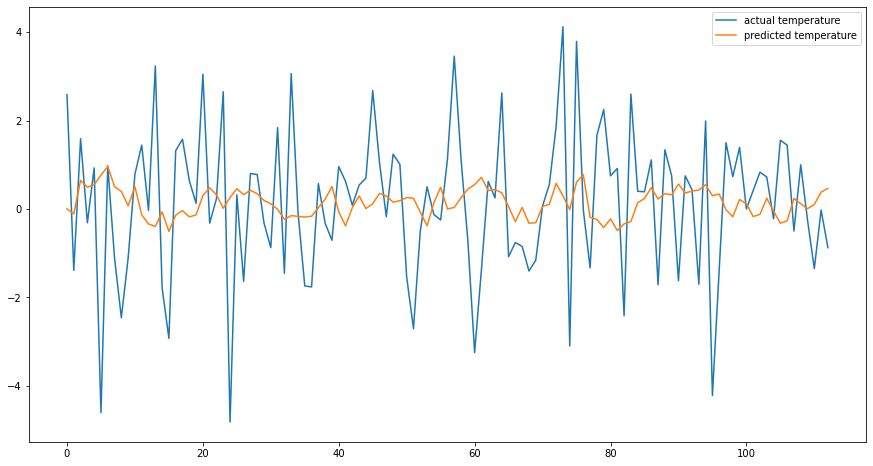

In [89]:
ax=plt.subplots(figsize=(15,8))
plt.plot(actual,label='actual temperature')
plt.plot(predicted,label='predicted temperature')
plt.legend()
plt.show()

In [90]:
df_res

,actual,predicted,err
0,2.586957,0.002734,2.584223
1,-1.388889,-0.110326,-1.278563
2,1.588889,0.648648,0.940241
3,-0.311111,0.493548,-0.804659
4,0.929293,0.550071,0.379222
...,...,...,...
108,1.000000,0.119651,0.880349
109,-0.250000,0.006643,-0.256643
110,-1.350000,0.103786,-1.453786
111,-0.025000,0.381518,-0.406518


<AxesSubplot:>

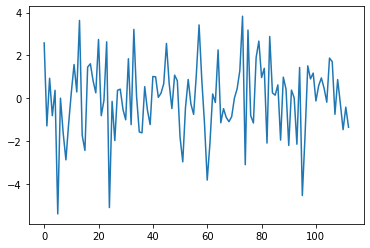

In [91]:
df_res.err.plot()

In [92]:
df_res.err.describe()

count    113.000000
mean       0.003526
std        1.745464
min       -5.376131
25%       -1.131324
50%        0.152716
75%        0.991521
max        3.827306
Name: err, dtype: float64

<AxesSubplot:>

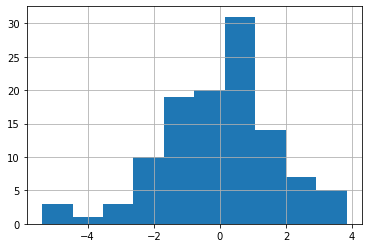

In [93]:
df_res.err.hist()

<AxesSubplot:ylabel='Density'>

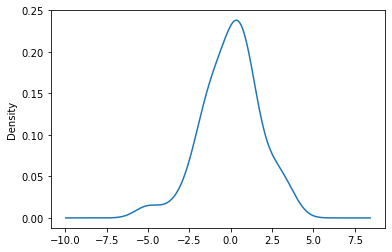

In [94]:
df_res.err.plot(kind='kde')

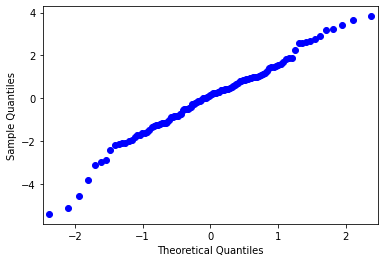

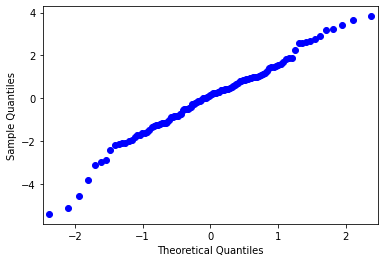

In [95]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_res.err)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

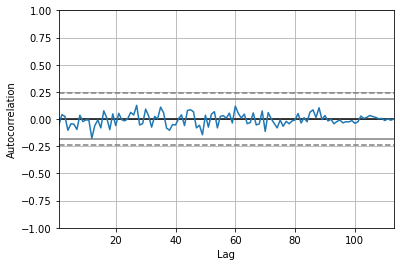

In [96]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_res.err)

In [97]:
# LJung-Box test
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model
